<a href="https://colab.research.google.com/github/AliConda/AliConda/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/3 PG AI Data Science with Python/california housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


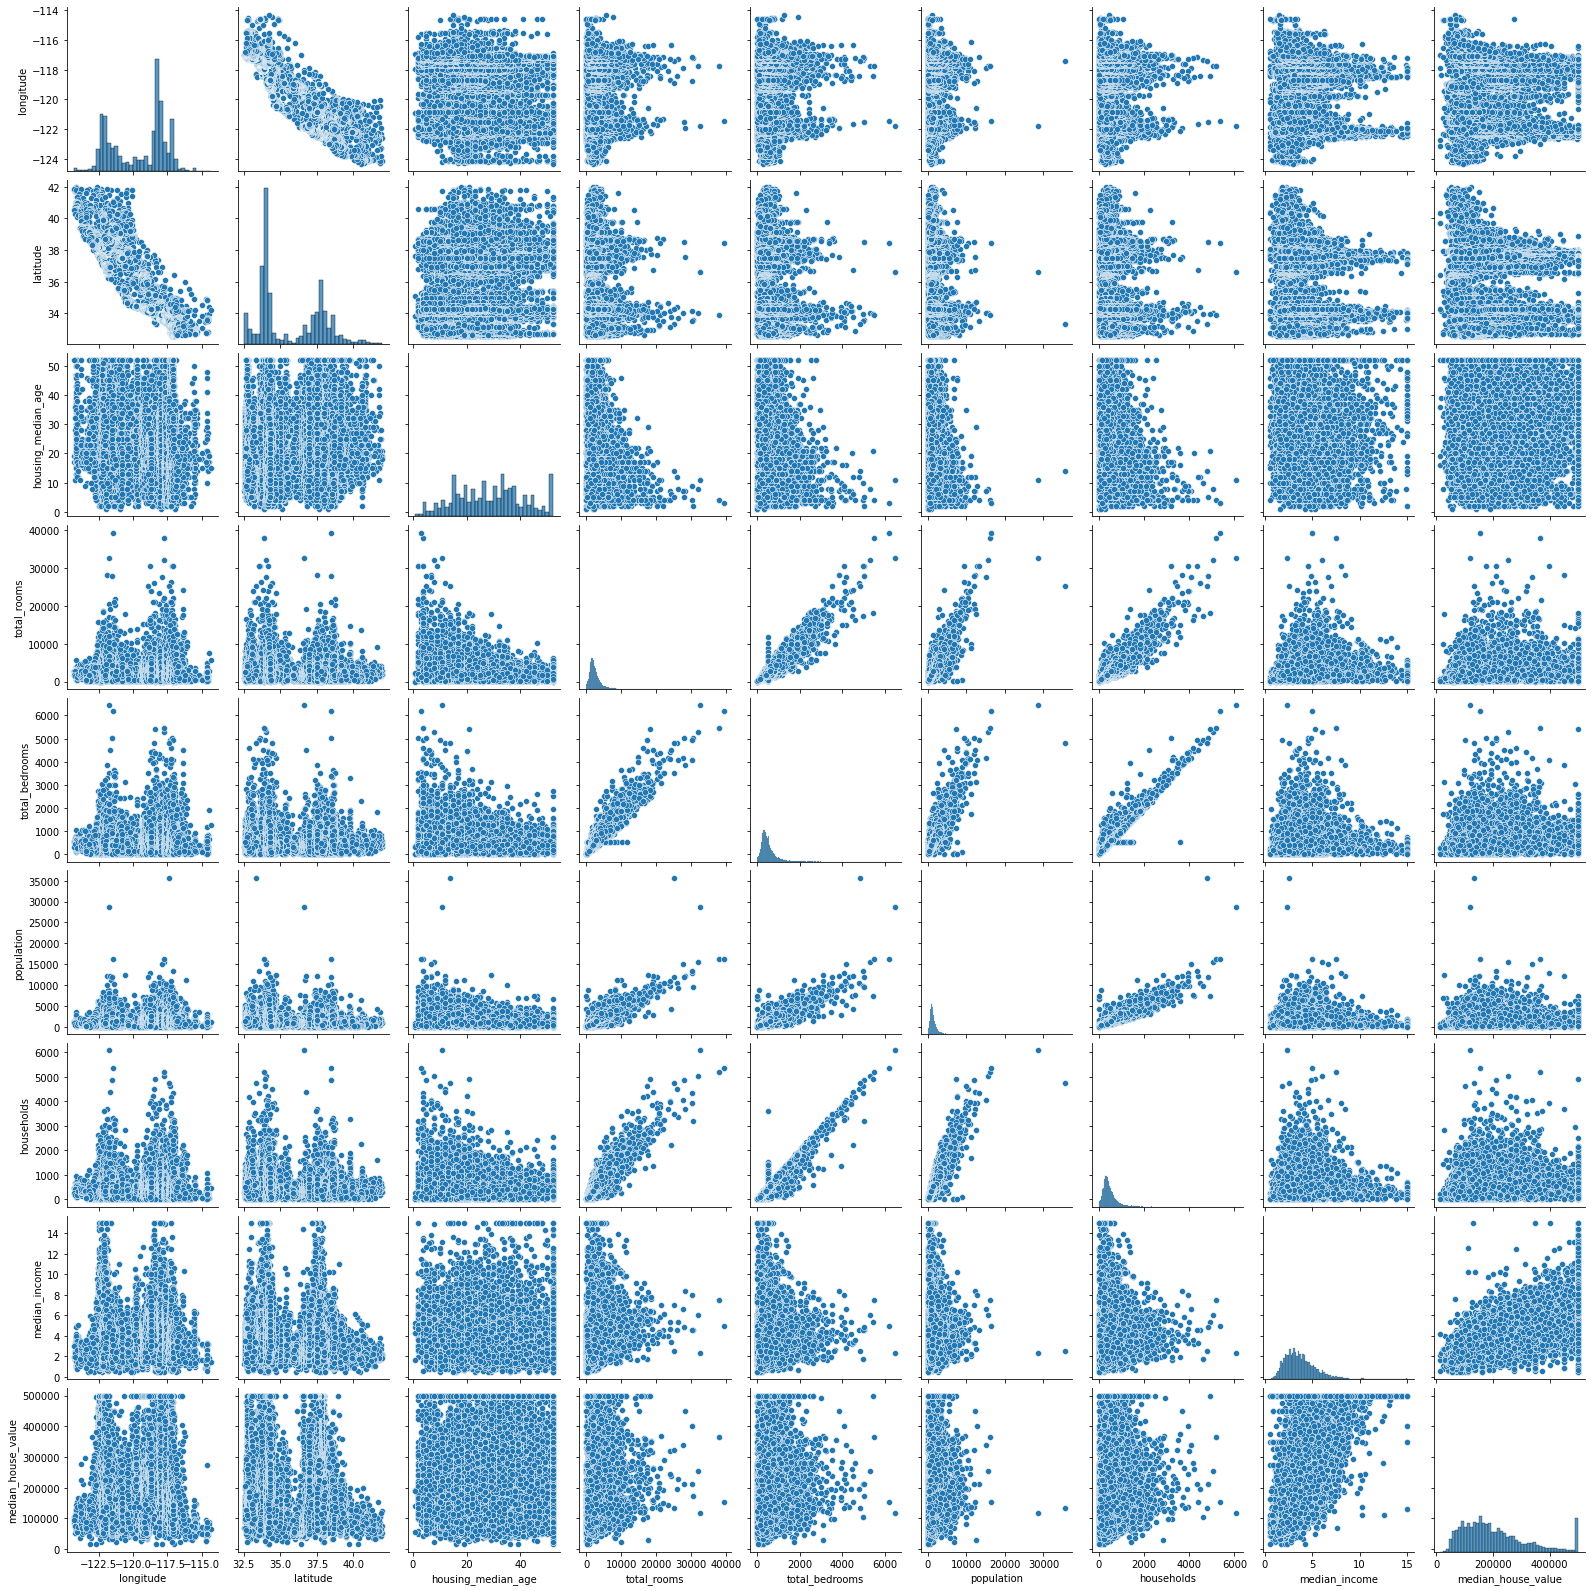

In [ ]:
sns.pairplot(df)

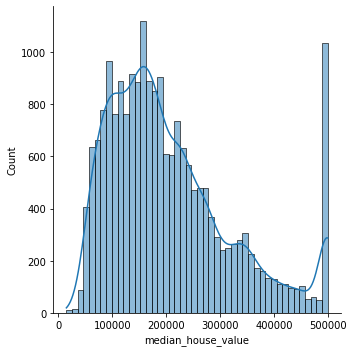

In [ ]:
sns.displot(df['median_house_value'],kde=True)

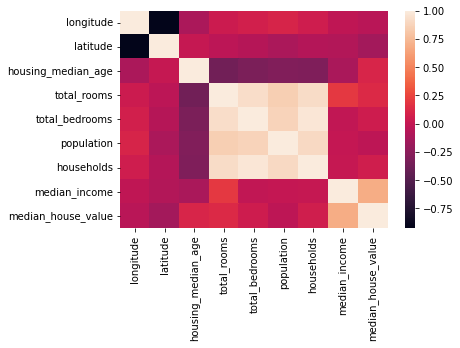

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.isnull().any()    #check for Nan values

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)   # fill the ana values in total_bedrooms column with mean of the column

In [ ]:
df.isnull().any() #check if Nan values are taken care of

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [ ]:
df['ocean_proximity'].unique()    #check the unique categories in the column ocean proximity

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

5

In [ ]:
newdf=pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)   #get dummies for the  column ocean proximity

In [ ]:
newdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [ ]:
newdf.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
newdf=newdf.reindex(columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN','median_house_value'])

In [ ]:
newdf.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0,452600


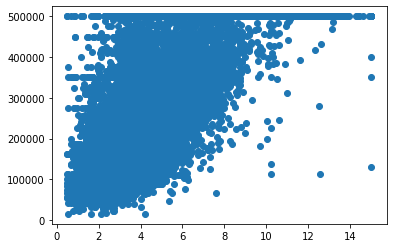

In [ ]:
plt.scatter(newdf['median_income'],newdf['median_house_value'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=newdf.iloc[:,:-1].values
y=newdf.iloc[:,-1].values

In [ ]:
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_trian)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import  LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

70670.72782772203

In [ ]:
r2_score(y_test,y_pred)

0.6288845460781115

##Bonus section

In [ ]:
model_2=LinearRegression()

In [ ]:
X_2=newdf.iloc[:,7].values
y_2=newdf.iloc[:,-1].values

In [ ]:
X_2train, X_2test,y_2train,y_2test=train_test_split(X_2,y_2,test_size=0.2)




In [ ]:
model_2.fit(X_2train.reshape(len(y_2train),1),y_2train.reshape(len(y_2train),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_2pred=model_2.predict(X_2test.reshape(len(X_2test),1))

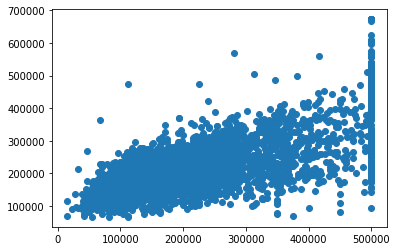

In [ ]:
plt.scatter(y_2test,y_2pred)

In [ ]:
r2_score(y_2test,y_2pred)

0.4795100148637238

##How about non scaled data

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
X_3=df.iloc[:,7].values.reshape(len(df),1)
y_3=df.iloc[:,-1].values.reshape(len(df),1)

In [ ]:
X_3train, X_3test,y_3train,y_3test=train_test_split(X_3,y_3,test_size=0.2)

In [ ]:
model_3=LinearRegression()

In [ ]:
model_3.fit(X_3train,y_3train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_3pred=model_3.predict(X_3test)

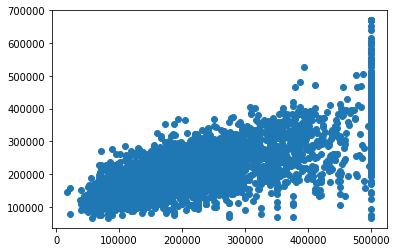

In [ ]:
plt.scatter(y_3test,y_3pred)

In [ ]:
r2_score(y_3test,y_3pred)

0.4967296001975664

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


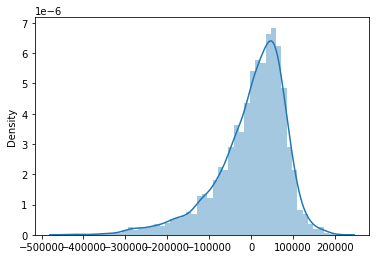

In [ ]:
sns.distplot(y_3pred-y_3test)  # not a normal distribution